<a href="https://colab.research.google.com/github/RusnaAida24/EcommerceAnalysis/blob/main/Ecommerce_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Load data into a Pandas DataFrame
df = pd.read_csv('/content/data-2.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Exploratory Data Analysis


In [2]:
# Columns' name
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [3]:
# Number of rows and columns
shapedf=df.shape
print("Rows:",shapedf[0])
print("Columns:",shapedf[1])

Rows: 498915
Columns: 8


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,498915.000000,498915.000000,376551.000000
mean,9.654067,4.597221,15284.763166
std,157.969391,95.757647,1712.229547
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13951.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16782.000000
max,74215.000000,38970.000000,18287.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498915 entries, 0 to 498914
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    498915 non-null  object 
 1   StockCode    498915 non-null  object 
 2   Description  497488 non-null  object 
 3   Quantity     498915 non-null  int64  
 4   InvoiceDate  498915 non-null  object 
 5   UnitPrice    498915 non-null  float64
 6   CustomerID   376551 non-null  float64
 7   Country      498915 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.5+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1427
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     122364
Country             0
dtype: int64

In [7]:
(117*100)/shapedf[0]

0.02345088842788852

Since the null values in description column is not more than 10%, we will delete the rows with null values.

In [8]:
df.dropna(subset=['Description'], inplace=True)
df.dropna(subset=['UnitPrice'], inplace=True)
df.dropna(subset=['Country'], inplace=True)

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     120937
Country             0
dtype: int64

In order to work on 'InvoiceDate' column more productive, we are converting the column to a datetime object.

In [10]:
df['InvoiceDate']= df['InvoiceDate'].astype('datetime64[ns]')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
498910,578544,23525,WALL ART BUFFALO BILL,6,2011-11-24 15:01:00,3.75,17096.0,United Kingdom
498911,578544,23524,WALL ART HORSE & PONY,6,2011-11-24 15:01:00,3.75,17096.0,United Kingdom
498912,578544,23527,WALL ART ANIMALS AND NATURE,6,2011-11-24 15:01:00,3.75,17096.0,United Kingdom
498913,578544,22770,MIRROR CORNICE,2,2011-11-24 15:01:00,14.95,17096.0,United Kingdom


In [11]:
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.isocalendar().day
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,3,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,3,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,8


In [12]:
df["InvoiceYear"].value_counts()

2011    455132
2010     42356
Name: InvoiceYear, dtype: int64

<Axes: xlabel='InvoiceYear', ylabel='count'>

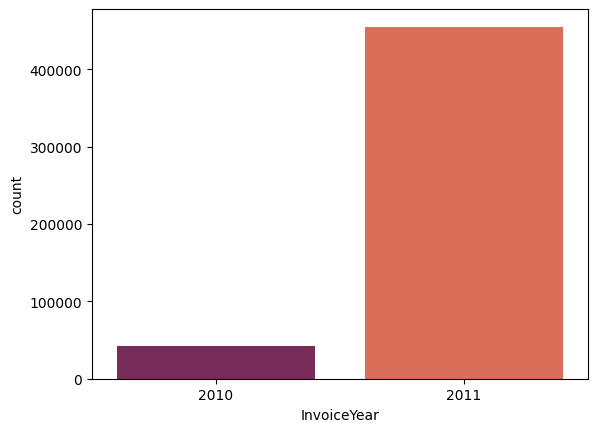

In [13]:
import seaborn as sns
sns.countplot(data= df, x= 'InvoiceYear', palette="rocket")

<Axes: xlabel='InvoiceDay', ylabel='count'>

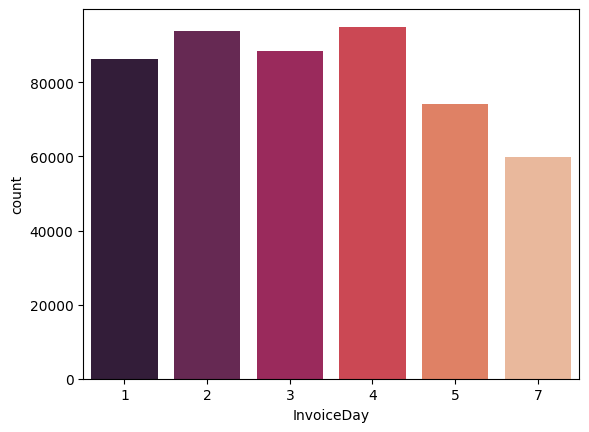

In [14]:
sns.countplot(data=df, x='InvoiceDay' , palette="rocket")

<Axes: xlabel='InvoiceMonth', ylabel='count'>

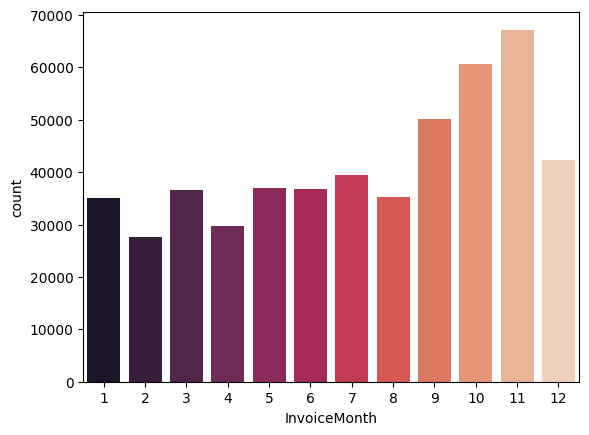

In [15]:
sns.countplot(data=df, x='InvoiceMonth', palette="rocket")

<Axes: xlabel='InvoiceHour', ylabel='count'>

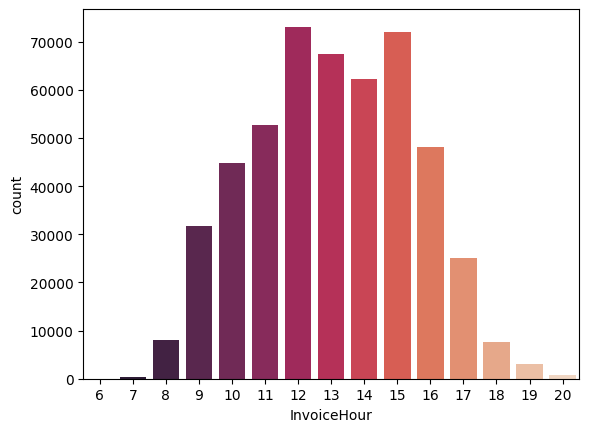

In [16]:
sns.countplot(data=df, x='InvoiceHour' , palette="rocket")

In [17]:
df.groupby(by='Country').sum()['Quantity'].sort_values(ascending=False)

<ipython-input-17-b15c35a0bffc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Country').sum()['Quantity'].sort_values(ascending=False)


Country
United Kingdom          3957355
Netherlands              192119
EIRE                     136669
Germany                  111431
France                   103303
Australia                 83653
Sweden                    35637
Switzerland               30174
Spain                     26451
Japan                     23227
Belgium                   22041
Portugal                  14612
Norway                    14035
Finland                    9962
Channel Islands            9422
Italy                      7975
Denmark                    7503
Cyprus                     6323
Singapore                  5234
Hong Kong                  4769
Austria                    4679
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2266
Greece                     1320
United Arab Emirates        982
Malta                       952
Lithuania                   652
USA                         626


Orders are mostly from United Kingdom followed by Netherlands and EIRE


In [18]:
df[df['InvoiceYear'] == 2010]['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain'], dtype=object)

In [19]:
df[df['InvoiceYear'] == 2011]['Country'].unique()

array(['United Kingdom', 'Sweden', 'Italy', 'Portugal', 'France',
       'Belgium', 'Bahrain', 'Germany', 'EIRE', 'Australia', 'Spain',
       'Japan', 'Israel', 'Cyprus', 'Netherlands', 'Poland',
       'Switzerland', 'Finland', 'Greece', 'Hong Kong', 'Singapore',
       'Iceland', 'Channel Islands', 'Lebanon', 'Austria', 'Norway',
       'United Arab Emirates', 'Denmark', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA', 'Uni'], dtype=object)

In [20]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2252
REGENCY CAKESTAND 3 TIER              2088
JUMBO BAG RED RETROSPOT               2049
PARTY BUNTING                         1683
LUNCH BAG RED RETROSPOT               1560
                                      ... 
 TOADSTOOL BEDSIDE LIGHT                 1
PINK PAINTED KASHMIRI CHAIR              1
SILICON CUBE 25W, BLUE                   1
Printing smudges/thrown away             1
PAINT YOUR OWN EGGS IN CRATE             1
Name: Description, Length: 4195, dtype: int64

In [21]:
df['Revenue']=df['Quantity']*df['UnitPrice']
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,3,8,22.00


Text(0.5, 1.0, 'Country-wise Revenue Sum')

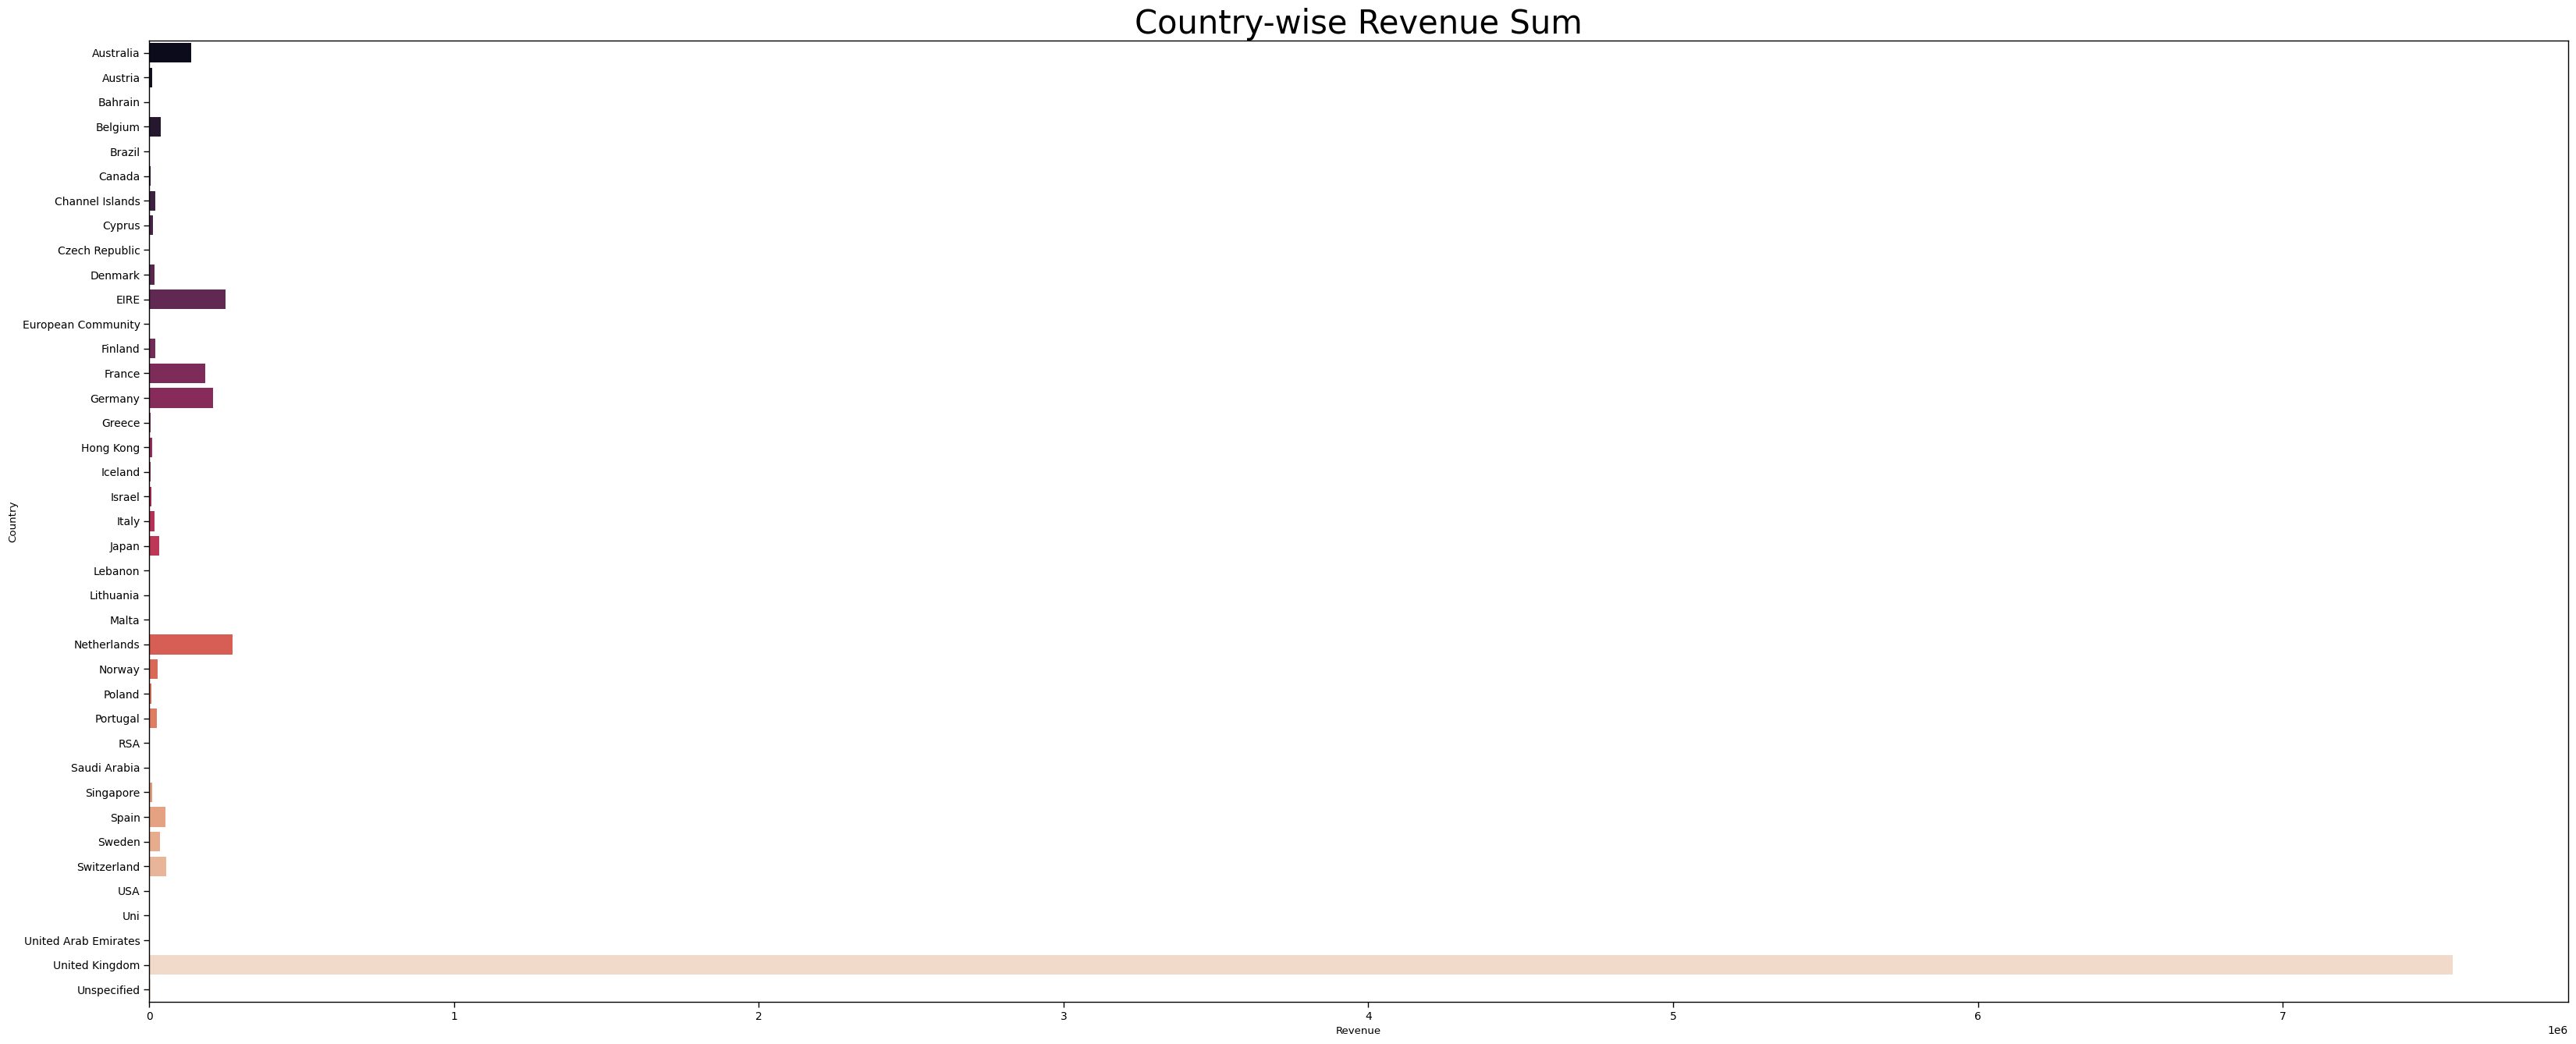

In [26]:
# Group by 'Country' and calculate the sum of 'Revenue' for each country
sum_revenue_by_country = df.groupby('Country')['Revenue'].sum().reset_index()

# Set the font size and adjust spacing before creating the plot
sns.set_context("paper", rc={"font.size": 20, "xtick.labelsize": 10, "ytick.labelsize": 10, "axes.ymargin": 0.1})
sns.color_palette("rocket")

# Plotting horizontal bar plot
plt.figure(figsize=(40, 16))
sns.barplot(x='Revenue', y='Country', data=sum_revenue_by_country, palette="rocket")
plt.title('Country-wise Revenue Sum', fontsize=30)

Text(0.5, 1.0, 'Country-wise Revenue Sum')

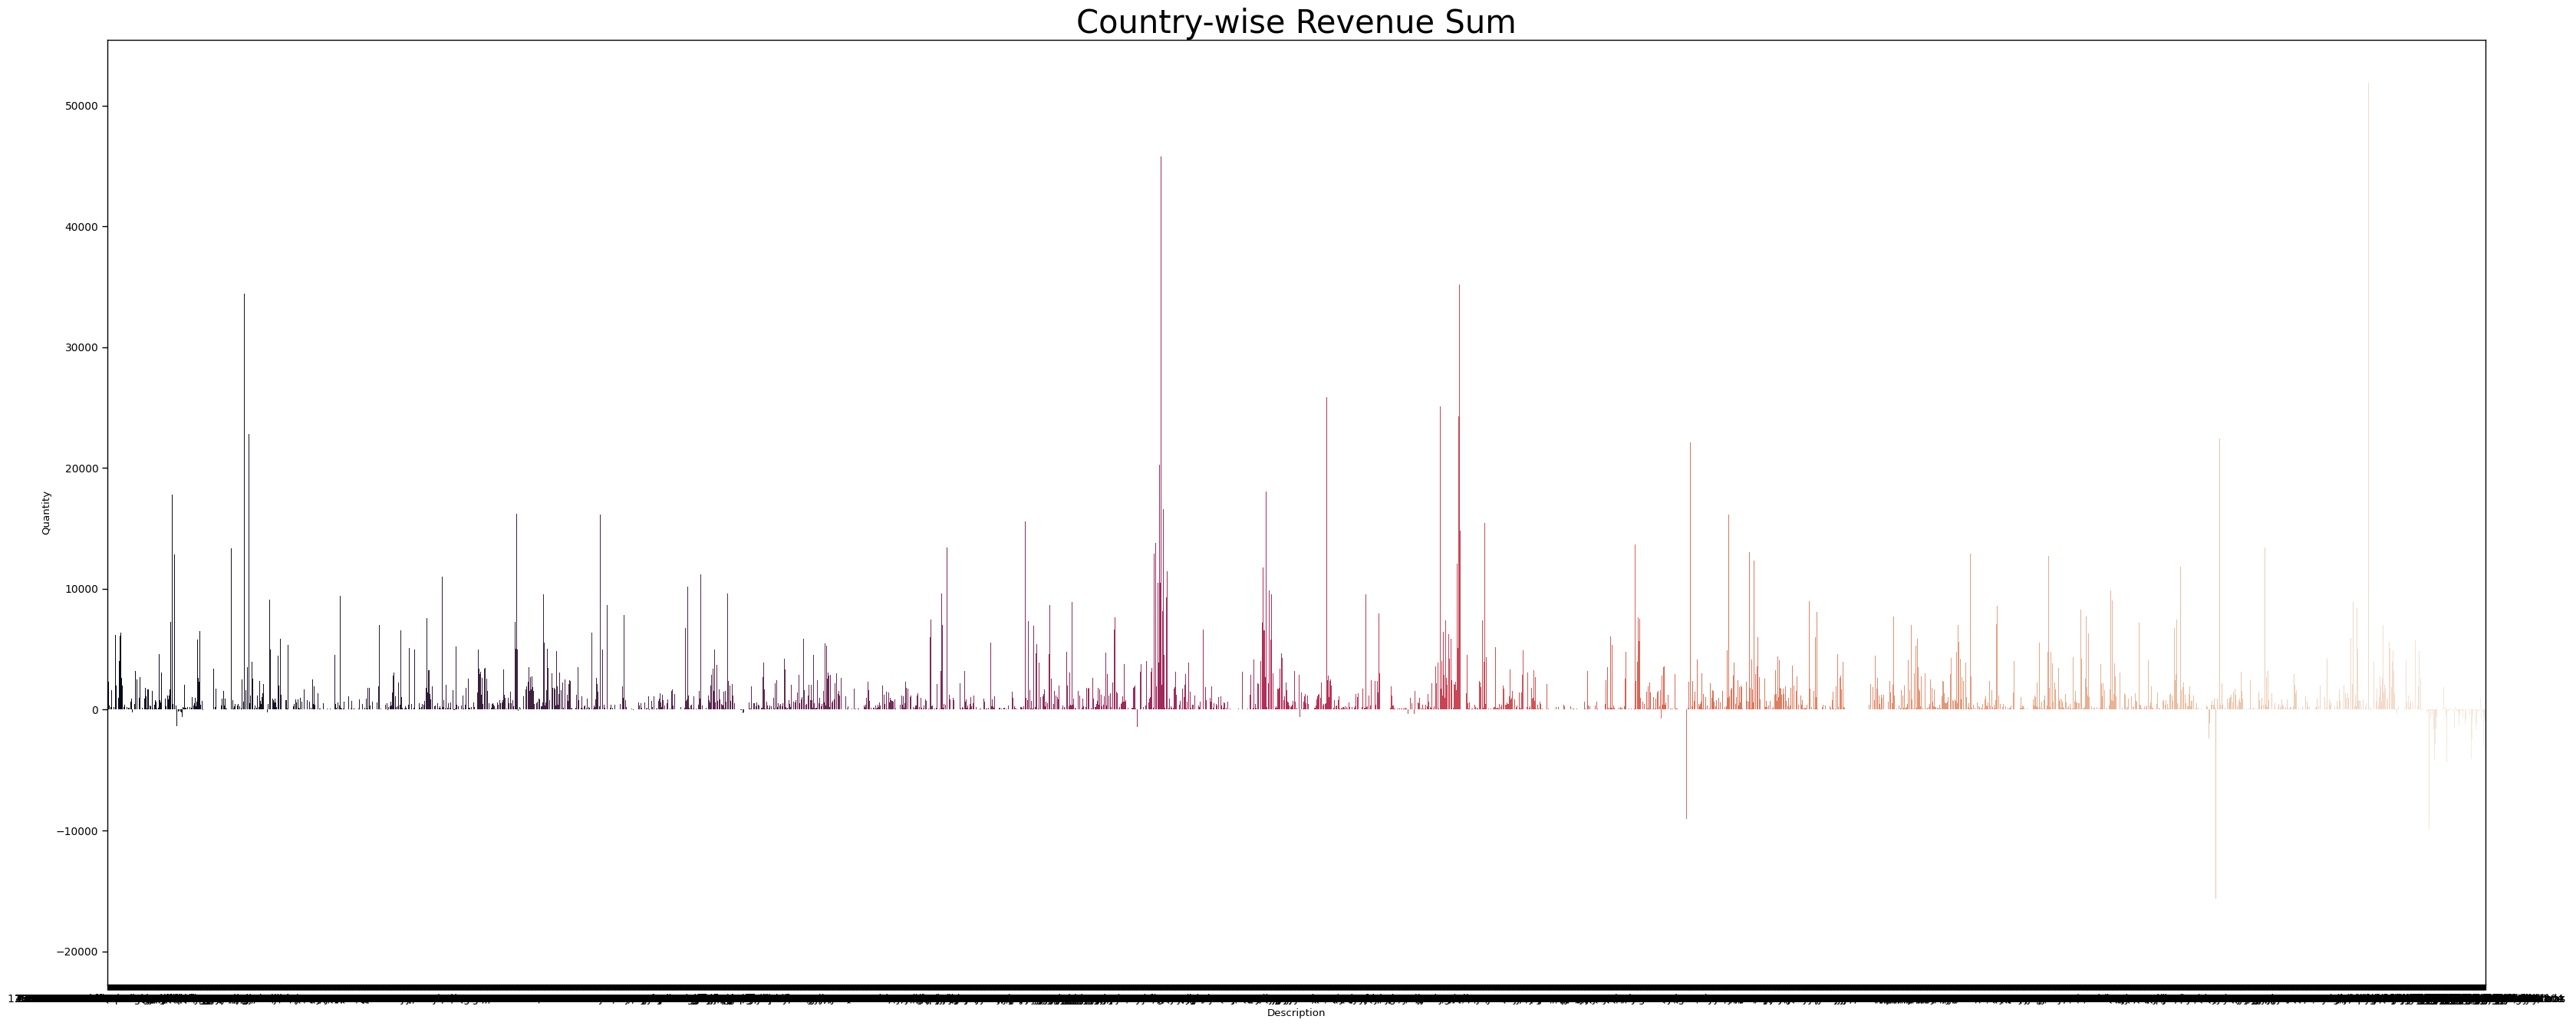

In [31]:
# Group by 'Country' and calculate the sum of 'Revenue' for each country
sum_quantity_by_prod_description = df.groupby('Description')['Quantity'].sum().reset_index()

# Set the font size and adjust spacing before creating the plot
sns.set_context("paper", rc={"font.size": 20, "xtick.labelsize": 10, "ytick.labelsize": 10, "axes.ymargin": 0.1})
sns.color_palette("rocket")

# Plotting horizontal bar plot
plt.figure(figsize=(40, 16))
sns.barplot(x='Description', y='Quantity', data=sum_quantity_by_prod_description, palette="rocket")
plt.title('Country-wise Revenue Sum', fontsize=30)